## Task 2 - To Explore Unsupervised Machine Learning

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.




### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading Data

In [2]:
data=pd.read_csv('Iris.csv')  ##to run this command put Iris.csv file and python file in same folder

In [3]:
data.shape

(150, 6)

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.isnull().sum()   ## we get there is no null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


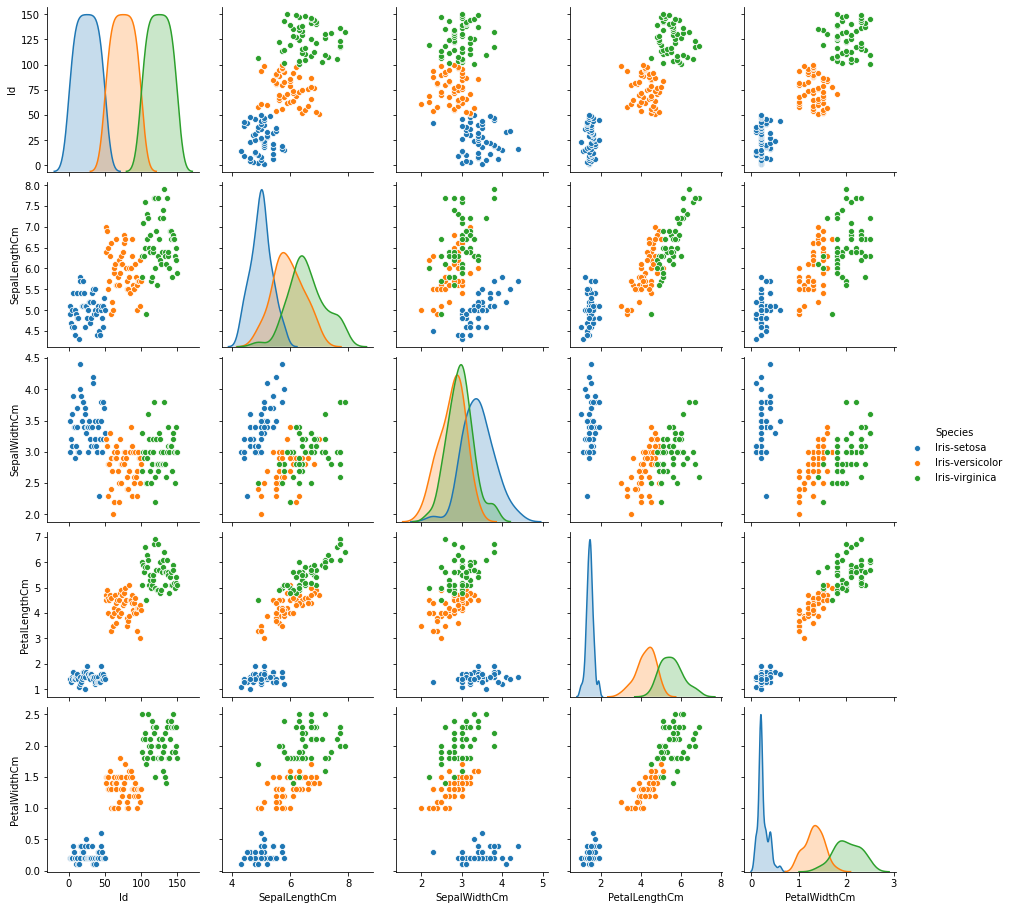

In [7]:
sns.pairplot(data , hue='Species')   ## distributn of SL,SW,PL,PW

In [8]:
data.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df=data.drop(['Id','Species'],axis=1)  ## to do clustering we donot need labels.so drop Species and Id

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Initial Clusters(Sepal)

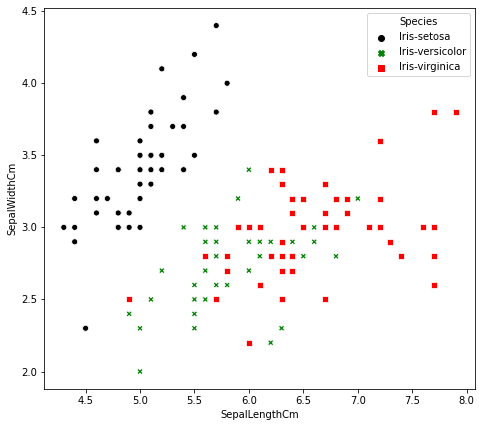

In [12]:

fig, ax = plt.subplots(figsize=(17,7))
plt.subplot(1,2,1)
sns.scatterplot(x = data.SepalLengthCm, y =  data.SepalWidthCm,
                hue = data.Species, style = data.Species, palette=['black', 'green', 'red']);

## Initial Clusters(Petal)

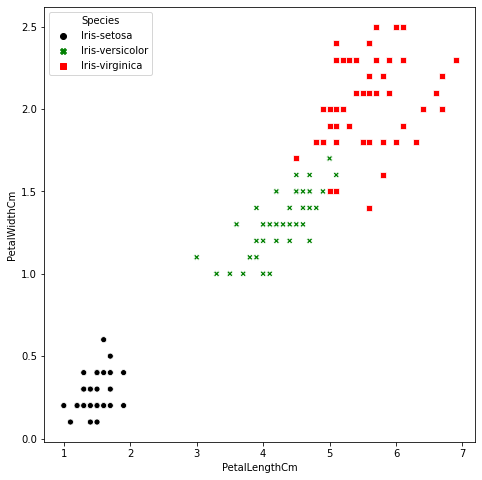

In [13]:

fig, ax = plt.subplots(figsize=(17,8))
plt.subplot(1,2,2)
sns.scatterplot(x = data.PetalLengthCm, y =  data.PetalWidthCm,
                hue = data.Species, style = data.Species, palette=['black', 'green', 'red']);

## To find the optimum number of clusters for K means

In [14]:
x=df.iloc[:,[0,1,2,3]].values

In [15]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

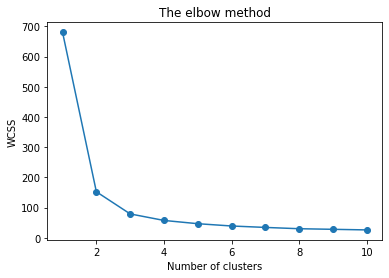

In [16]:
plt.plot(range(1, 11), wcss,'-o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

##### From the above graph, we can see, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3

In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

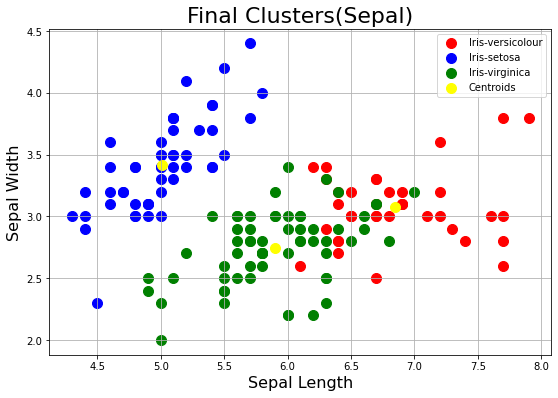

In [18]:
plt.figure(figsize=(9,6))
plt.title('Final Clusters(Sepal)', fontsize=22) 
# making both the axis equal
plt.xlabel('Sepal Length', fontsize=16)                                                  # X-Axis
plt.ylabel('Sepal Width', fontsize=16)
# Y-Axis
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.grid() 
plt.legend()

In [19]:
from sklearn.preprocessing import Normalizer

In [20]:
normalizer = Normalizer()
kmeans=KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

In [21]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(normalizer,kmeans)  ##added above created normalizer & kmeans 
pipeline.fit(df)        

Pipeline(steps=[('normalizer', Normalizer()), ('kmeans', KMeans(n_clusters=3))])

In [22]:

pipeline=make_pipeline(normalizer,kmeans)

In [23]:
pipeline.fit(x)

Pipeline(steps=[('normalizer', Normalizer()), ('kmeans', KMeans(n_clusters=3))])

In [24]:

labels= pipeline.predict(x)

In [25]:

df= pd.DataFrame({'labels':labels,'species':data['Species']})

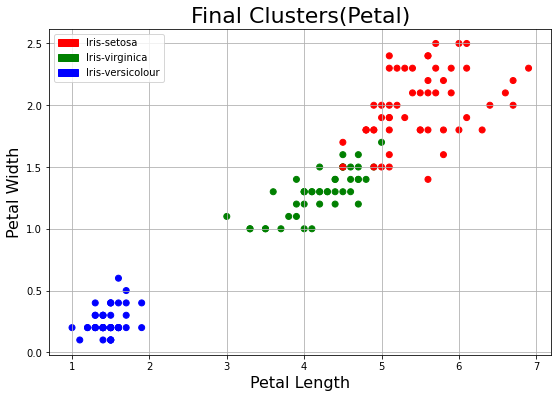

In [26]:
import matplotlib.patches as mpatches
plt.figure(figsize=(9,6))
colormap = np.array(['red', 'blue','green'])
pop_a = mpatches.Patch(color='red', label='Iris-setosa')
pop_b = mpatches.Patch(color='green', label='Iris-virginica')
pop_c = mpatches.Patch(color='blue', label='Iris-versicolour')

plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],c=colormap[labels] )
plt.legend(handles=[pop_a,pop_b,pop_c])
plt.xlabel('Petal Length', fontsize=16) 
plt.ylabel('Petal Width', fontsize=16)                                                 
plt.title('Final Clusters(Petal)', fontsize=22)# Title of the plot
plt.grid() 